In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv(r"C:\Users\heena\Downloads\UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
dataset.shape

(1156, 7)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
dataset['PURPOSE'].fillna("NOT",inplace=True)

In [9]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],errors='coerce')
dataset['END_DATA'] = pd.to_datetime(dataset['END_DATE'],errors='coerce')

In [11]:
from datetime import datetime
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

dataset['day-night'] = pd.cut(x=dataset['time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [12]:
dataset.dropna(inplace=True)

In [13]:
dataset.drop_duplicates(inplace=True)

In [16]:
#visualization
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size
unique_values

{'END_DATE': 413,
 'CATEGORY': 2,
 'START': 108,
 'STOP': 112,
 'PURPOSE': 7,
 'date': 113}

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

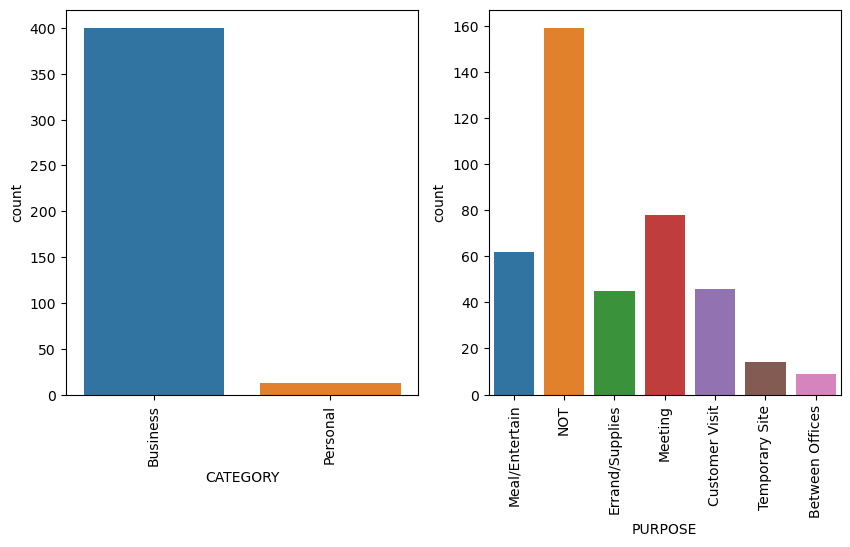

In [20]:
#matplolib & seaborn for countplot category and purpose cols
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='CATEGORY', data=dataset)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='PURPOSE', data=dataset)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

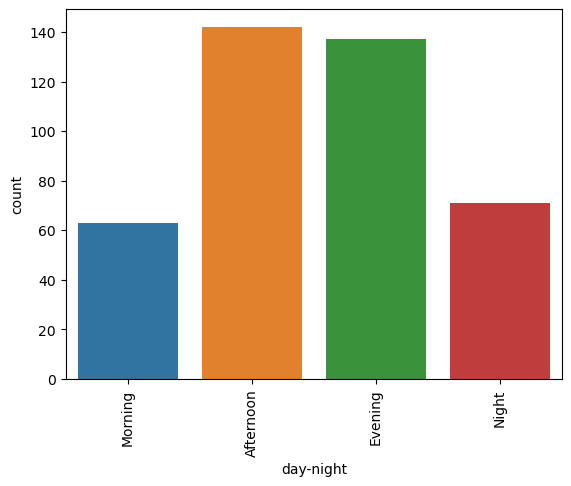

In [22]:
sns.countplot(x='day-night', data=dataset)
plt.xticks(rotation=90)

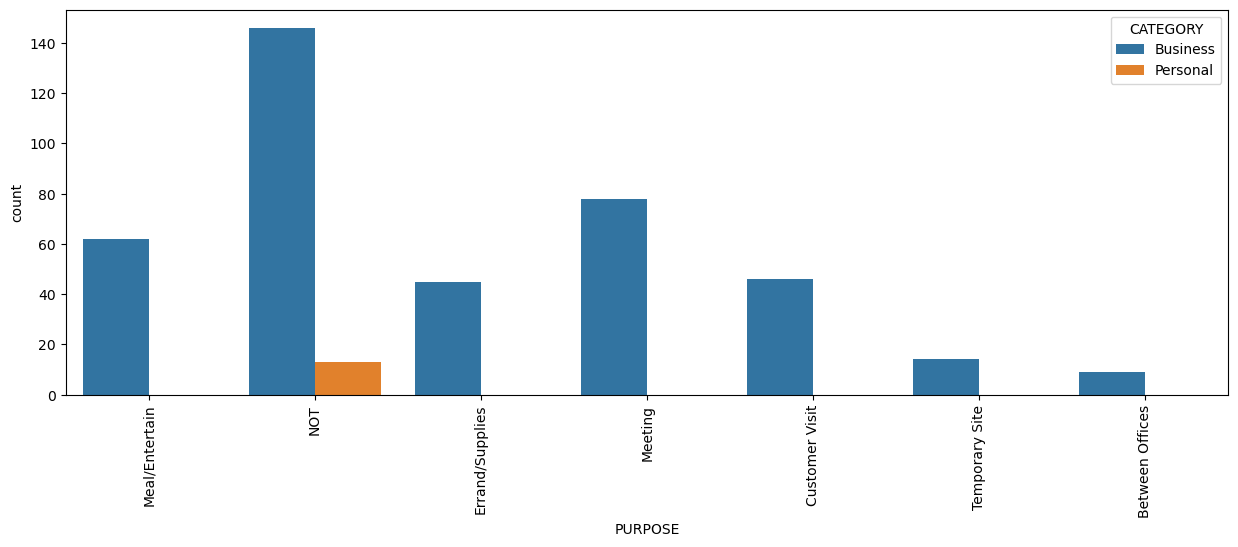

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

In [25]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY','PURPOSE']
OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)

C:\Users\heena\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


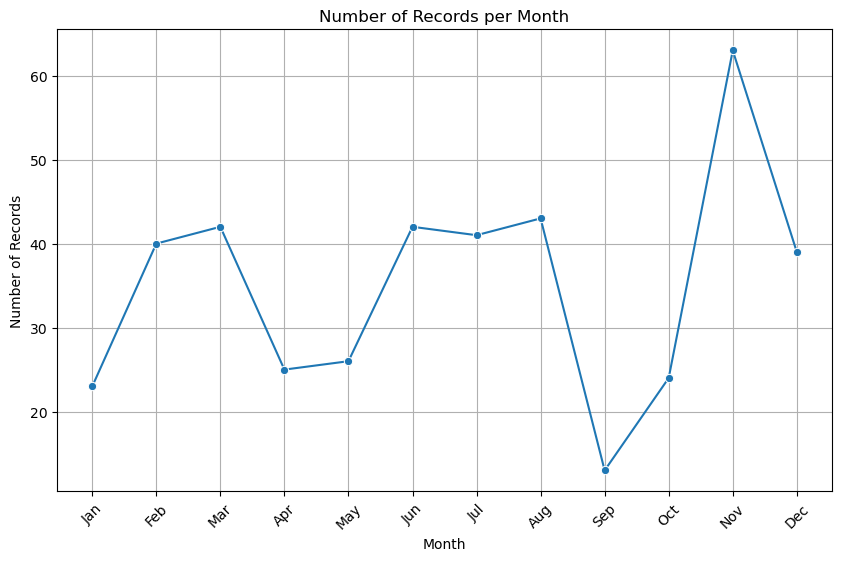

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv(r"C:\Users\heena\Downloads\UberDataset.csv")

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')

dataset.dropna(subset=['START_DATE'], inplace=True)

dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month

monthly_counts = dataset['MONTH'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.xticks(ticks=monthly_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.title('Number of Records per Month')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.grid()
plt.show()


In [10]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
     0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

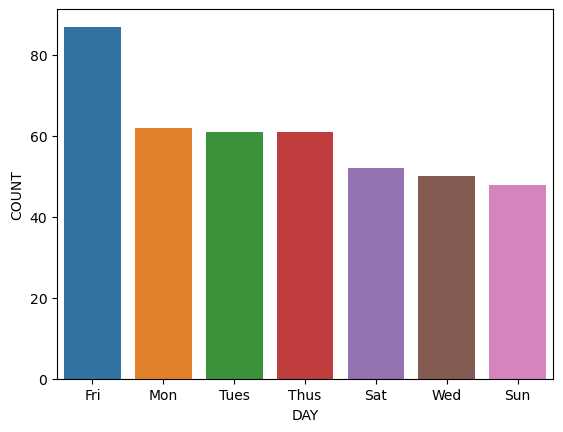

In [11]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: >

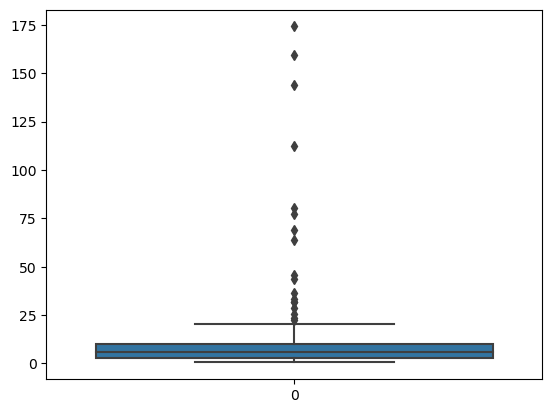

In [12]:
sns.boxplot(dataset['MILES'])

<Axes: >

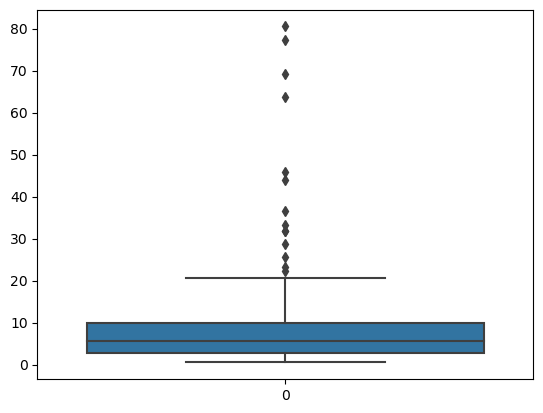

In [13]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

C:\Users\heena\AppData\Local\Temp\ipykernel_17212\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

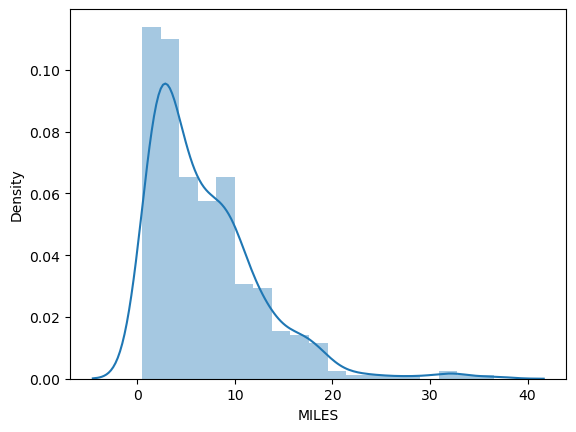

In [14]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])